In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
city=pd.read_excel("city.xlsx")
city.head()

,date,hour,requests,trips,supply hours,average minutes of trips,pETA,aETA,utiliz
0,2013-09-01,11,79,55,42.63,20.43,5.51,7.19,0.479240
1,2013-09-01,12,73,41,36.43,15.53,5.48,8.48,0.426297
2,2013-09-01,13,54,50,23.02,17.76,5.07,8.94,0.771503
3,2013-09-02,11,193,170,64.20,31.47,5.31,6.55,0.490187
4,2013-09-02,12,258,210,80.28,38.68,4.94,6.08,0.481814


In [53]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      90 non-null     datetime64[ns]
 1   hour                      90 non-null     int64         
 2   requests                  90 non-null     int64         
 3   trips                     90 non-null     int64         
 4   supply hours              90 non-null     float64       
 5   average minutes of trips  90 non-null     float64       
 6   pETA                      90 non-null     float64       
 7   aETA                      90 non-null     float64       
 8   utiliz                    90 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 6.5 KB


In [54]:
# most time of requests
req_hour=city.groupby(['hour'],as_index=True).agg({'requests':sum},inplace=True)
req_hour

,requests
hour,
11,6008
12,8530
13,6559


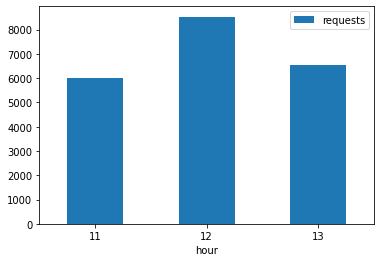

In [55]:
req_hour.plot(kind='bar')
plt.xticks(rotation=0)

plt.show()

In [56]:
#most date of requests
req_date=city.groupby(['date'],as_index=True).agg({'requests':sum},inplace=True)
req_date

,requests
date,
2013-09-01,206
2013-09-02,604
2013-09-03,238
2013-09-04,199
2013-09-05,782
2013-09-06,654
2013-09-07,1432
2013-09-08,965
2013-09-09,903


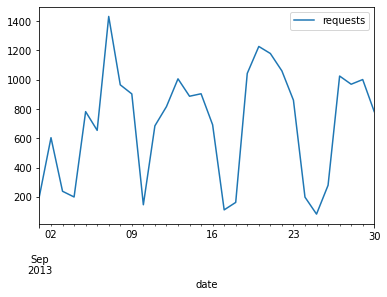

In [57]:
req_date.plot(kind='line')
plt.show()


In [67]:
# accomplishment of hour
com_hour = city.groupby(['hour'],as_index=True).agg({'requests':sum,'trips':sum},inplace=True)
com_hour

,requests,trips
hour,,
11,6008,4550
12,8530,5850
13,6559,3085


In [59]:
com_hour['rate']=com_hour['trips']/com_hour['requests']
com_hour

,hour,requests,trips,rate
0,11,6008,4550,0.757324
1,12,8530,5850,0.685815
2,13,6559,3085,0.470346


In [64]:
# accomplishment of date
com_date = city.groupby(['date'],as_index=False).agg({'requests':sum,'trips':sum},inplace=True)
com_date['rate']=com_date['trips']/com_date['requests']
com_date.sort_values('date').head()

,date,requests,trips,rate
0,2013-09-01,206,146,0.708738
1,2013-09-02,604,487,0.806291
2,2013-09-03,238,83,0.348739
3,2013-09-04,199,102,0.512563
4,2013-09-05,782,532,0.680307


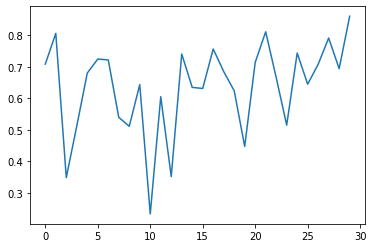

In [61]:
com_date.rate.plot(kind='line')
plt.show()


In [62]:
# waiting time of customers
eta_hour = city.groupby(['hour'],as_index=True).agg({'pETA':np.mean,'aETA':np.mean},inplace=True)
eta_hour


,pETA,aETA
hour,,
11,5.397333,6.611000
12,5.860000,7.253333
13,6.018333,7.732667
